<a href="https://colab.research.google.com/github/Hassan-zeidan/AAI614_Zeidan/blob/main/Week%203/Assignment%201/Week_3_Ass1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Construct and Interpret Confidence Intervals**



---



---



---



Download a dataset with at least 1,000 values of a single numeric variable (e.g., fuel efficiency, weight, height). Treat this as your full population. From this, draw repeated random samples (e.g., 20 samples of size 30). For each, construct a 95% confidence interval for the mean and check whether it contains the true population mean (computed from the full dataset).

What proportion of your intervals capture the true mean?
Generate a horizontal plot of the 95% confidence intervals you constructed.


 **In this Assignment I'll make the study about Breast Cancer.  
Ill take the age column and apply what I have learned in Lesson 1 .**


In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

**uploading the csv File**

In [74]:
df = pd.read_csv('/content/Breast_Cancer.csv')
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


**Choosing the age column and changinf it into a numpy array that will help us do the calculations..**

In [75]:
x = df['Age'].to_numpy()
x

array([68, 50, 58, ..., 68, 58, 46])

**The number of Population values**

In [76]:
x.size

4024

In [77]:
# Population mean
pop_mean = x.mean()
print(f"The population mean is : {round(pop_mean,3)}")

The population mean is : 53.972


In [78]:
rng = np.random.default_rng(123)
confidence_level = 0.95
n=50  # sample size
k=25  # number of samples
dof = n - 1
alpha = 1 - confidence_level
t_star = stats.t.ppf(1 - alpha/2, df=dof)

In [79]:
intervals=[]
hits=0
samples=rng.choice(x,size=(k,n), replace=True)

for sample in samples:
  m = sample.mean()         # mean on each sample
  sd = sample.std(ddof=1)   # standard daviation
  se = sd / np.sqrt(n)     # standard error
  lo = m - t_star * se     # cinfidense interval
  hi = m + t_star * se     # confidence interval
  intervals.append((lo,hi))   #adding the confidense interval to the empty list we already created before
  hits += int(lo <= pop_mean <= hi)

coverage = hits / k

print(f"Coverage proportion: {coverage:.3f}")

Coverage proportion: 1.000


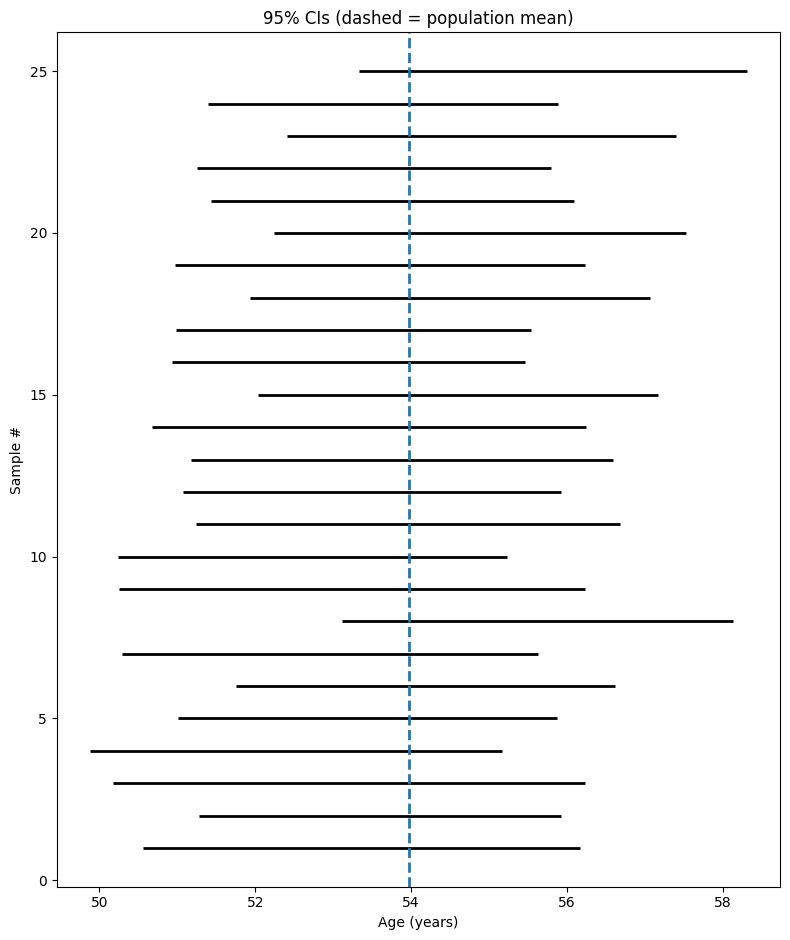

In [80]:
los, his = np.array(intervals).T
y = np.arange(1, len(intervals)+1)
miss = (pop_mean < los) | (pop_mean > his)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 0.3*len(intervals) + 2))
for i in range(len(intervals)):
    plt.hlines(y[i], los[i], his[i], color='red' if miss[i] else 'black', linewidth=2)
plt.axvline(pop_mean, linestyle='--', linewidth=2)
plt.xlabel('Age (years)')
plt.ylabel('Sample #')
plt.title('95% CIs (dashed = population mean)')
plt.tight_layout()
plt.show()

parts of the assignments where I used Ai to change some of my answers :  
1) rng = np.random.default_rng(123) , This creates a random number generator using NumPy’s newer method (recommended since NumPy 1.17+)  
2) hits=0 and how to find the number of intervals that contain the true mean.  
3) ddof=1 in sd = sample.std(ddof=1) code was a new concept for me , it means n-1 ..
4) hits += int(lo <= pop_mean <= hi)
5) I used some help to graph, I struggle to memorize the codes needed to graph using python , but i can understand the meaning of each line. this part was new for me (color='red' if miss[i] else 'black')